In [621]:
import pandas as pd
from sklearn import preprocessing,metrics,model_selection
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10)

<h1>Task 1</h1>

In [622]:
data_t1=pd.read_table('task1_data.tsv')

In [623]:
data_t1.describe()

,search_flags_0,search_flags_1,search_flags_2,search_flags_3,search_flags_4,search_flags_5,search_flags_6,search_flags_7,search_flags_8,session_ip_cc_0,session_ip_cc_1,session_ip_cc_2,session_ip_cc_3,session_ip_cc_4,session_ip_cc_5,session_ip_cc_6,session_ip_cc_7,session_ip_cc_8,impr_base_rel_bonus_numeric,impr_job_age_numeric,impr_salary_numeric,search_q_age_numeric,search_q_job_type_numeric,search_q_radius_km_numeric,search_q_salary_gte_numeric,query_title_word_0,query_title_word_1,query_title_2gram_0,impr_company_boolean,impr_salary_boolean,job_id_region_boolean,search_q_age_boolean,search_q_radius_km_boolean,search_q_salary_gte_boolean,company_view_0,company_view_1,company_view_2,company_view_3,title_view_0,title_view_1,title_view_2,title_view_3,word_boost_0,word_boost_1,word_boost_2,word_boost_3,word_boost_4,word_boost_5,word_boost_6,word_boost_7,word_boost_8,word_boost_9,2gram_boost_0,2gram_boost_1,2gram_boost_2,2gram_boost_3,2gram_boost_4,2gram_boost_5,2gram_boost_6,2gram_boost_7,2gram_boost_8,2gram_boost_9,2gram_boost_10,2gram_boost_11,2gram_boost_12,2gram_boost_13,2gram_boost_14,2gram_boost_15,2gram_boost_16,2gram_boost_17,2gram_boost_18,2gram_boost_19,2gram_boost_20,2gram_boost_21,2gram_boost_22,2gram_boost_23,2gram_boost_24,2gram_boost_25,2gram_boost_26,2gram_boost_27,2gram_boost_28,2gram_boost_29,2gram_boost_30,2gram_boost_31,2gram_boost_32,2gram_boost_33,2gram_boost_34,2gram_boost_35,2gram_boost_36,2gram_boost_37,2gram_boost_38,2gram_boost_39,2gram_boost_40,2gram_boost_41,2gram_boost_42,2gram_boost_43,2gram_boost_44,2gram_boost_45,2gram_boost_46,2gram_boost_47,2gram_boost_48,2gram_boost_49,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31,cluster_32,cluster_33,cluster_34,cluster_35,cluster_36,cluster_37,cluster_38,cluster_39,cluster_40,cluster_41,cluster_42,cluster_43,cluster_44,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,cluster_58,cluster_59,cluster_60,cluster_61,cluster_62,cluster_63,cluster_64,cluster_65,cluster_66,cluster_67,cluster_68,cluster_69,cluster_70,cluster_71,cluster_72,cluster_73,cluster_74,cluster_75,cluster_76,cluster_77,cluster_78,cluster_79,cluster_80,cluster_81,cluster_82,cluster_83,cluster_84,cluster_85,cluster_86,cluster_87,cluster_88,cluster_89,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99,click,ind
count,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.00000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.00000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.00000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.00000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.0

In [624]:
data_t1.head()

,search_flags_0,search_flags_1,search_flags_2,search_flags_3,search_flags_4,search_flags_5,search_flags_6,search_flags_7,search_flags_8,session_ip_cc_0,session_ip_cc_1,session_ip_cc_2,session_ip_cc_3,session_ip_cc_4,session_ip_cc_5,session_ip_cc_6,session_ip_cc_7,session_ip_cc_8,impr_base_rel_bonus_numeric,impr_job_age_numeric,impr_salary_numeric,search_q_age_numeric,search_q_job_type_numeric,search_q_radius_km_numeric,search_q_salary_gte_numeric,query_title_word_0,query_title_word_1,query_title_2gram_0,impr_company_boolean,impr_salary_boolean,job_id_region_boolean,search_q_age_boolean,search_q_radius_km_boolean,search_q_salary_gte_boolean,company_view_0,company_view_1,company_view_2,company_view_3,title_view_0,title_view_1,title_view_2,title_view_3,word_boost_0,word_boost_1,word_boost_2,word_boost_3,word_boost_4,word_boost_5,word_boost_6,word_boost_7,word_boost_8,word_boost_9,2gram_boost_0,2gram_boost_1,2gram_boost_2,2gram_boost_3,2gram_boost_4,2gram_boost_5,2gram_boost_6,2gram_boost_7,2gram_boost_8,2gram_boost_9,2gram_boost_10,2gram_boost_11,2gram_boost_12,2gram_boost_13,2gram_boost_14,2gram_boost_15,2gram_boost_16,2gram_boost_17,2gram_boost_18,2gram_boost_19,2gram_boost_20,2gram_boost_21,2gram_boost_22,2gram_boost_23,2gram_boost_24,2gram_boost_25,2gram_boost_26,2gram_boost_27,2gram_boost_28,2gram_boost_29,2gram_boost_30,2gram_boost_31,2gram_boost_32,2gram_boost_33,2gram_boost_34,2gram_boost_35,2gram_boost_36,2gram_boost_37,2gram_boost_38,2gram_boost_39,2gram_boost_40,2gram_boost_41,2gram_boost_42,2gram_boost_43,2gram_boost_44,2gram_boost_45,2gram_boost_46,2gram_boost_47,2gram_boost_48,2gram_boost_49,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31,cluster_32,cluster_33,cluster_34,cluster_35,cluster_36,cluster_37,cluster_38,cluster_39,cluster_40,cluster_41,cluster_42,cluster_43,cluster_44,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,cluster_58,cluster_59,cluster_60,cluster_61,cluster_62,cluster_63,cluster_64,cluster_65,cluster_66,cluster_67,cluster_68,cluster_69,cluster_70,cluster_71,cluster_72,cluster_73,cluster_74,cluster_75,cluster_76,cluster_77,cluster_78,cluster_79,cluster_80,cluster_81,cluster_82,cluster_83,cluster_84,cluster_85,cluster_86,cluster_87,cluster_88,cluster_89,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99,click,ind
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.538462,0.005607,0.0,1.0,0,1.0,0,0,0,0,1,0,1,1,1,0,14,2,0,0,34,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8678,0.8290,0.6629,0.8862,0.8901,0.9144,0.7659,0.8930,0.8947,0.8942,0.9373,0.8806,0.7466,0.9494,0.9255,0.9097,0.9093,0.9038,0.9363,0.8728,0.9365,0.8678,0.8578,0.9141,0.8783,0.9233,0.9457,0.8785,0.9075,0.9327,0.9019,0.9004,0.9293,0.8727,0.9423,0.8846,0.8428,0.8764,0.9439,0.8553,0.9284,0.9274,0.2908,0.9340,0.8643,0.9002,0.8418,0.7470,0.9264,0.9231,0.8859,0.9445,0.8887,0.9493,0.9465,0.9504,0.9132,0.9319,0.9590,0.9147,0.9043,0.9149,0.9586,0.9189,0.9059,0.9554,0.9314,0.9277,0.9373,0.9618,0.8963,0.9349,0.9084,0.8938,0.9304,0.9517,0.9565,0.9240,0.9097,0.9613,0.8955,0.9399,0.9064,0.9211,0.9087,0.9695,0.9515,0.8875,0.9322,0.9150,0.9197,0.8905,0.9397,0.9254,0.8840,0.9361,0.9377,0.9421,0.9438,0.9422,1,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.769231,0.014936,0.0,1.0,0,1.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,69,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.9763,0.9373,0.9663,0.9421,0.9649,0.9805,0.9905,0.9121,0.9222,0.9307,0.9994,0.9681,0.9706,0.9756,0.9994,0.930

In [625]:
#drop 'ind' column 
data_t1 = data_t1.drop('ind',axis=1,errors='ignore')
greater_col = data_t1.columns[data_t1.max(axis=0)>1]


In [626]:
data_t1[greater_col]

,company_view_0,company_view_1,company_view_2,company_view_3,title_view_0,title_view_1,title_view_2,title_view_3
0,14,2,0,0,34,4,0,2
1,0,0,0,0,69,25,0,0
2,43,7,0,0,49,6,0,0
3,29,4,0,0,38,3,0,0
4,30,30,0,2,31,4,0,0
...,...,...,...,...,...,...,...,...
54094,29,29,0,0,17,17,0,0
54095,28,28,0,0,18,1,0,0
54096,14,14,0,0,26,1,0,0
54097,7,7,0,0,32,0,0,0


In [627]:
min_max_scaler = preprocessing.MinMaxScaler()
df = data_t1
df = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns, index=df.index)

In [628]:
df.describe()

,search_flags_0,search_flags_1,search_flags_2,search_flags_3,search_flags_4,search_flags_5,search_flags_6,search_flags_7,search_flags_8,session_ip_cc_0,session_ip_cc_1,session_ip_cc_2,session_ip_cc_3,session_ip_cc_4,session_ip_cc_5,session_ip_cc_6,session_ip_cc_7,session_ip_cc_8,impr_base_rel_bonus_numeric,impr_job_age_numeric,impr_salary_numeric,search_q_age_numeric,search_q_job_type_numeric,search_q_radius_km_numeric,search_q_salary_gte_numeric,query_title_word_0,query_title_word_1,query_title_2gram_0,impr_company_boolean,impr_salary_boolean,job_id_region_boolean,search_q_age_boolean,search_q_radius_km_boolean,search_q_salary_gte_boolean,company_view_0,company_view_1,company_view_2,company_view_3,title_view_0,title_view_1,title_view_2,title_view_3,word_boost_0,word_boost_1,word_boost_2,word_boost_3,word_boost_4,word_boost_5,word_boost_6,word_boost_7,word_boost_8,word_boost_9,2gram_boost_0,2gram_boost_1,2gram_boost_2,2gram_boost_3,2gram_boost_4,2gram_boost_5,2gram_boost_6,2gram_boost_7,2gram_boost_8,2gram_boost_9,2gram_boost_10,2gram_boost_11,2gram_boost_12,2gram_boost_13,2gram_boost_14,2gram_boost_15,2gram_boost_16,2gram_boost_17,2gram_boost_18,2gram_boost_19,2gram_boost_20,2gram_boost_21,2gram_boost_22,2gram_boost_23,2gram_boost_24,2gram_boost_25,2gram_boost_26,2gram_boost_27,2gram_boost_28,2gram_boost_29,2gram_boost_30,2gram_boost_31,2gram_boost_32,2gram_boost_33,2gram_boost_34,2gram_boost_35,2gram_boost_36,2gram_boost_37,2gram_boost_38,2gram_boost_39,2gram_boost_40,2gram_boost_41,2gram_boost_42,2gram_boost_43,2gram_boost_44,2gram_boost_45,2gram_boost_46,2gram_boost_47,2gram_boost_48,2gram_boost_49,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_30,cluster_31,cluster_32,cluster_33,cluster_34,cluster_35,cluster_36,cluster_37,cluster_38,cluster_39,cluster_40,cluster_41,cluster_42,cluster_43,cluster_44,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49,cluster_50,cluster_51,cluster_52,cluster_53,cluster_54,cluster_55,cluster_56,cluster_57,cluster_58,cluster_59,cluster_60,cluster_61,cluster_62,cluster_63,cluster_64,cluster_65,cluster_66,cluster_67,cluster_68,cluster_69,cluster_70,cluster_71,cluster_72,cluster_73,cluster_74,cluster_75,cluster_76,cluster_77,cluster_78,cluster_79,cluster_80,cluster_81,cluster_82,cluster_83,cluster_84,cluster_85,cluster_86,cluster_87,cluster_88,cluster_89,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99,click
count,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.00000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.00000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.00000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.00000,54099.000000,54099.000000,54099.000000,54099.000000,54099.000000,54099.00000

In [629]:
df.isnull().any().any()

False

In [630]:
val = df.values
data = val[:,:-1]
label = val[:,-1]

In [631]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, label,test_size = 0.2)

In [632]:
rfc = RandomForestClassifier(max_depth=20,n_estimators=50,n_jobs=-1)

In [633]:
gbs = GradientBoostingClassifier(max_depth=5)

In [634]:
xgbs = xgb.XGBClassifier(max_depth=6,learning_rate=0.25)

In [635]:
def evaluate(clf,train_data,train_labels,test_data,test_labels):
    clf.fit(train_data, train_labels)    
    pred_proba = clf.predict_proba(test_data)
    pred = pred_proba.argmax(axis=1)
    accuracy = metrics.accuracy_score(test_labels, pred)
    log_loss = metrics.log_loss(test_labels, pred)
    auc_score = metrics.roc_auc_score(test_labels, pred_proba[:,-1])

    print(type(clf).__name__,"log-loss: %f," % log_loss, "accuracy: %f," % accuracy,'auc-score %f' % auc_score)    
    #return probability of the transition
    return pred_proba[:,-1]

In [636]:
evaluate(rfc,train_data,train_labels,test_data,test_labels)


RandomForestClassifier log-loss: 12.382364, accuracy: 0.641497, auc-score 0.680706


array([ 0.34771019,  0.80067932,  0.18530996, ...,  0.57253698,
        0.82880277,  0.8241344 ])

In [637]:
evaluate(gbs,train_data,train_labels,test_data,test_labels)

GradientBoostingClassifier log-loss: 12.120582, accuracy: 0.649076, auc-score 0.695036


array([ 0.37835524,  0.60718829,  0.29808549, ...,  0.45435415,
        0.35670955,  0.54639022])

In [638]:
evaluate(xgbs,train_data,train_labels,test_data,test_labels)

XGBClassifier log-loss: 11.689656, accuracy: 0.661553, auc-score 0.704989


array([ 0.36820003,  0.68986124,  0.13224277, ...,  0.46402228,
        0.42368305,  0.80462599], dtype=float32)

<h1>Task 2</h1>

In [639]:
data_t2=pd.read_table('task2_data.tsv')

In [640]:
data_t2.head()

,search_id,search_date,clicks,group
0,-3136706724385003188,2017-11-23,0,2
1,-3139609516900744687,2017-11-22,0,2
2,-776473245209166820,2017-11-22,0,2
3,2254608150971607405,2017-11-25,1,2
4,2397168305001145852,2017-11-24,0,2


In [641]:
data_t2.describe()

,search_id,clicks,group
count,9.662000e+03,9662.000000,9662.000000
mean,5.127190e+16,0.534568,2.503001
std,5.327594e+18,0.909413,0.500017
min,-9.220836e+18,0.000000,2.000000
25%,-4.578733e+18,0.000000,2.000000
50%,1.348137e+17,0.000000,3.000000
75%,4.576849e+18,1.000000,3.000000
max,9.220794e+18,15.000000,3.000000


In [652]:
data_t2.isnull().any().any()

False

<h2>CTR</h2>

In [642]:
group_2 =  data_t2[data_t2['group']==2]
ctr_2= group_2['clicks'].mean()*100
print('CTR for group 2: %f %%' % ctr_2)

CTR for group 2: 55.705956 %


In [643]:
group_3 =  data_t2[data_t2['group']==3]
ctr_3= group_3['clicks'].mean()*100
print('CTR for group 3: %f %%' % ctr_3)

CTR for group 3: 51.234568 %


In [644]:
total_ctr = data_t2['clicks'].mean()*100
print('total CTR: %f %%' % total_ctr)

total CTR: 53.456841 %


<h3>Independent T-test</h3>

<h4>Two Sided</h4>
<h4>Hypothesis H0: the mean of group 2 and group 3 are equal (CTR are equal)</h4>
<h4>Hypothesis H1: the mean of group 2 and group 3 are not equal</h4>

In [645]:
N1=group_2['clicks'].shape[0]
N2=group_3['clicks'].shape[0]
df = (N1 + N2 - 2)

In [646]:
t_val,p_val = scipy.stats.ttest_ind(group_3['clicks'],group_2['clicks'], equal_var = False)
print('t-statistic %f:' % t_val,'pvalue %f' % p_val)

t-statistic -2.416832: pvalue 0.015675


In [647]:
cm = CompareMeans(DescrStatsW(group_2['clicks']), DescrStatsW(group_3['clicks']))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal',alpha=0.05))

95% confidence interval: [0.008448, 0.080980]


In [648]:
t_score_095 = stats.t.ppf(0.95,df)
t_score_09 = stats.t.ppf(0.9,df)
print('t-test results: H0 rejected:','\n- significance level 0.9:',abs(t_val)>t_score_09,
      '\n- significance level 0.95:',abs(t_val)>t_score_095)

t-test results: H0 rejected: 
- significance level 0.9: True 
- significance level 0.95: True


<h5>Conclusion: H0 is rejected, the mean of group 2 and group 3 are not equal</h5>

<h4>One Sided</h4>
<h4>Hypothesis H0: the mean of group 2 is greater than the mean of group 3 (CTR of group 2 > CTR of group 3)</h4>
<h4>Hypothesis H1: the mean of group 2 is smaller than the mean of group 3</h4>

In [649]:
one_side_pval=1-p_val/2
one_side_pval
print('p value for one-side hypothesis',one_side_pval)

p value for one-side hypothesis 0.992162660695


<h5>Conclusion: H0 is accepted, the mean of group 2 is greater than the mean of group 3 (significance level α=0.1)<h5>

<h4>Distribution</h4>

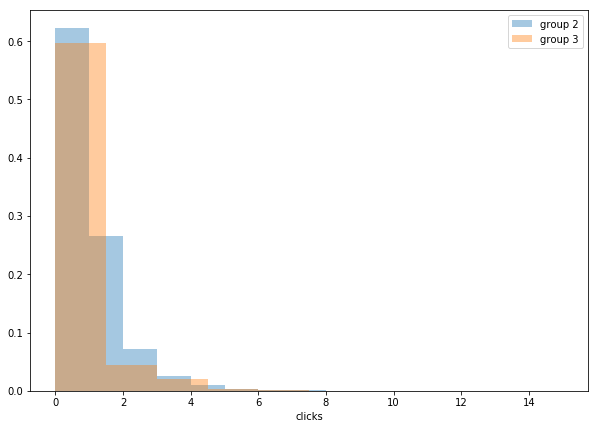

In [650]:
plt.figure(figsize=(10,7))
sns.distplot(group_2['clicks'],norm_hist =True,bins=10,hist=True,kde =False,hist_kws={"lw": 3, "label": "group 2"})
sns.distplot(group_3['clicks'],norm_hist =True,bins=10,hist=True,kde =False,hist_kws={"lw": 3, "label": "group 3"})
plt.legend()

<h4>Boxplot</h4>

C:\Users\Oles\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


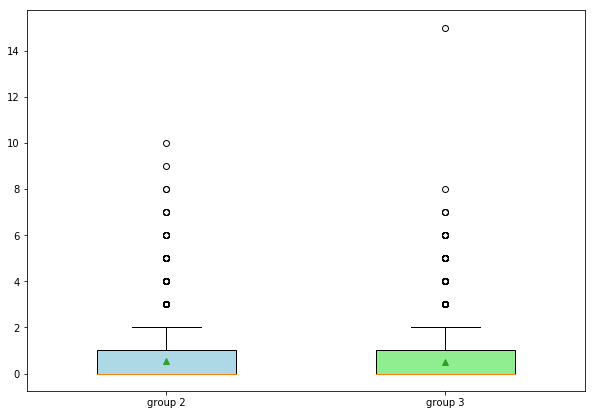

In [651]:
c=['red','green']
data=[group_2['clicks'],group_3['clicks']]
plt.figure(figsize=(10,7))
box=plt.boxplot(data,labels=['group 2','group 3'],showmeans =True,widths =0.5,patch_artist =True)
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()